In [1]:
import os
import numpy as np
import ipywidgets as widgets

import draw
import utils
import test
import sketch_class
import preprocess

%matplotlib widget

In [2]:
IMG_SIZE = 256 # image size, do not change

In [3]:
RANDOM_STATE = 10       # random state, change if a shuffle refresh is desired
MAX_N_PTS = 196         # drawing complexity, increase for greater complexity, decrease for faster training
NUM_PREPROCESSED = 200 # number of preprocessed drawings to generate in each category
NUM_DATA = 200         # number of training/testing/validation drawings to use in each category, must be <= NUM_PREPROCESSED

In [4]:
to_preprocess = True   # if preprocessing data is desired
to_train = False        # if training model is desired

In [5]:
train_split = 0.80
test_split = 0.10
validation_split = 0.10

batch_size = 64
epochs = 15

In [6]:
data_dir = os.path.join(os.getcwd(), 'data')
preprocessed_data_dir = os.path.join(data_dir, 'preprocessed')
raw_data_dir = os.path.join(data_dir, 'raw')
student_data_dir = os.path.join(data_dir, 'student')

model_dir = os.path.join(os.getcwd(), 'models')

# Artist vs. the Machine:
## Can you beat an AI at Pictionary?

#### An interactive tutorial using Google's [Quick, Draw!](https://quickdraw.withgoogle.com/data) dataset

## What is Artificial Intelligence (AI)?

- What is Artificial Intelligence?
- Is AI as smart as humans?
- How do scientists use AI?

## What is image classification?

Using AI to label (or *classify*) an image.

#### Example:
Label the following pictures as either:
- cat
- dog
- bird
- cow

interactive(children=(ToggleButton(value=False, description='Label!'), Output()), _dom_classes=('widget-intera…

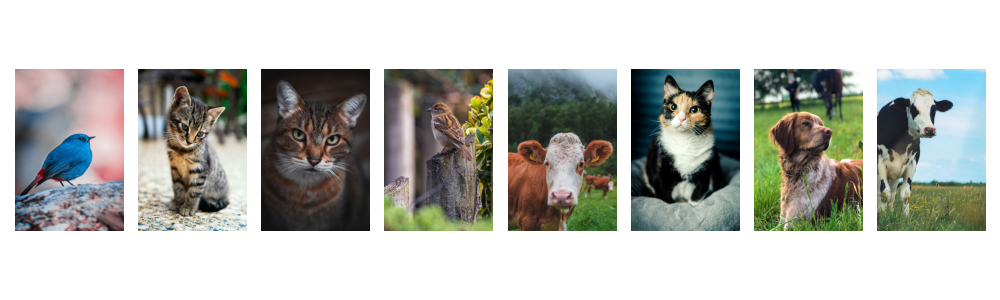

In [7]:
utils.image_grid_widget('images/animals', 8)

That was pretty easy - so what do we need AI for?

#### Example:
Label the following pictures as either:
- mallard duck
- pekin duck
- goose
- swan

interactive(children=(ToggleButton(value=False, description='Label!'), Output()), _dom_classes=('widget-intera…

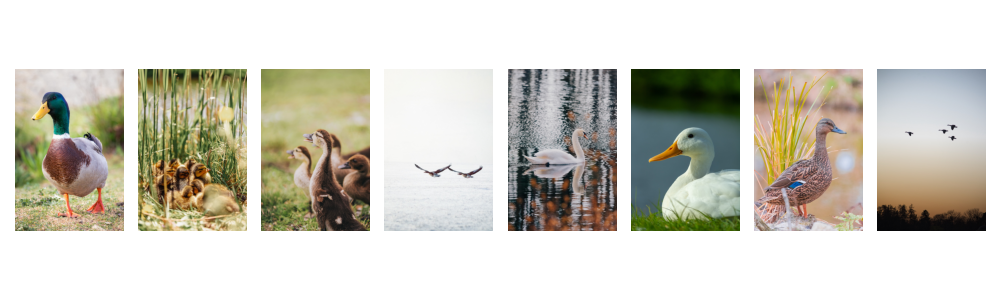

In [8]:
utils.image_grid_widget('images/birds', 8)

#### Discussion questions
- Why is this image classification problem so much harder than the last one?

## How are Pictionary and image classification similar?

In Pictionary, someone draws a picture...

![preview](images/preview.jpeg)

and everyone else tries to guess what they're drawing: also known as image classification!

## If humans can play Pictionary, can AI?

We are going to create a Pictionary-playing AI and name it **DAISY**: **D**rawing-classifying **A**rtificial **I**ntelligence for **S**cience-**Y** stuff (half the fun of creating an AI is naming it!)

In [9]:
AI_name = 'DAISY'

We can make a simple AI a lot faster than we can make a complicated one. So, we are going to limit our goal to having DAISY be able to recognize drawings that are just a few different kinds of weather.

In [10]:
with open(os.path.join(os.getcwd(),'categories.txt')) as f:
    categories = [line.rstrip('\n') for line in f]

print('weather types:')
for c in categories:
    print(f'    {c}')

weather types:
    cloud
    hurricane
    lightning
    rain
    rainbow
    sun
    snowflake
    tornado


interactive(children=(ToggleButton(value=False, description='Label!'), Output()), _dom_classes=('widget-intera…

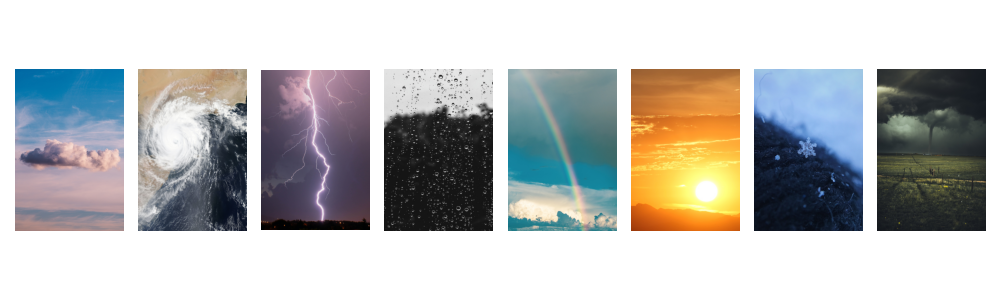

In [11]:
utils.image_grid_widget('images/weather', 8)

## How do we make an AI?

How did you learn what a cat looks like?

Think about all of the cats you have seen: in real life, in drawings, in movies, etc. 

In AI language, you have seen a lot of *data* on cats.

An AI is like a newborn baby. It needs to learn what objects are called by consuming data.

#### Discussion questions
- How do babies learn what objects are called?
- How would we do something similar for a computer (or for DAISY)?

## Data

We are going to show DAISY a bunch of drawings done by people online of each of our weather types, then tell her what each of these drawings is.

We'll use 1,500 images of each weather type: so 1,500 clouds, 1,500 hurricanes, etc.

In [12]:
preprocess.preprocess_raw_data(MAX_N_PTS, IMG_SIZE, raw_data_dir, preprocessed_data_dir,
                               NUM_PREPROCESSED, preprocess=to_preprocess)

[PREPROCESSING cloud data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING hurricane data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING lightning data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING rain data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING rainbow data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING sun data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING snowflake data]


  0%|          | 0/200 [00:00<?, ?it/s]

[PREPROCESSING tornado data]


  0%|          | 0/200 [00:00<?, ?it/s]

In [13]:
dataset = sketch_class.get_data(preprocessed_data_dir, NUM_DATA)

Now let's take a look at some of our data!

2023-09-25 16:37:01.339714: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


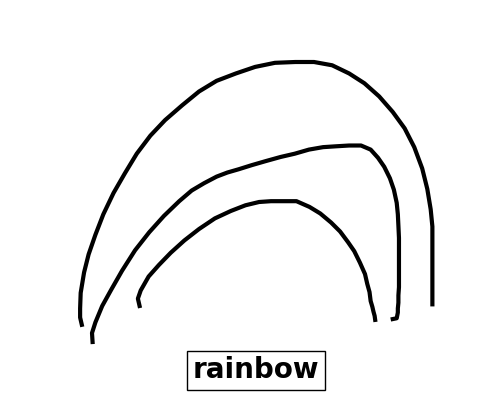

In [15]:
draw.draw(dataset, 'rainbow', index=10)

2023-09-25 16:37:03.085081: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


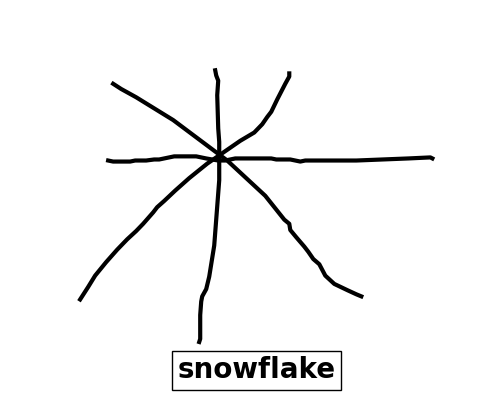

In [16]:
draw.draw(dataset, 'snowflake', index=1)

Those were some pretty good drawings.

But if you've ever played Pictionary, you know that some people are better at drawing than others.

You also know that some things are harder to draw than others.

interactive(children=(Dropdown(description='Row:', options=(1, 2, 3, 4), value=None), Dropdown(description='Co…

2023-09-25 16:37:09.191071: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


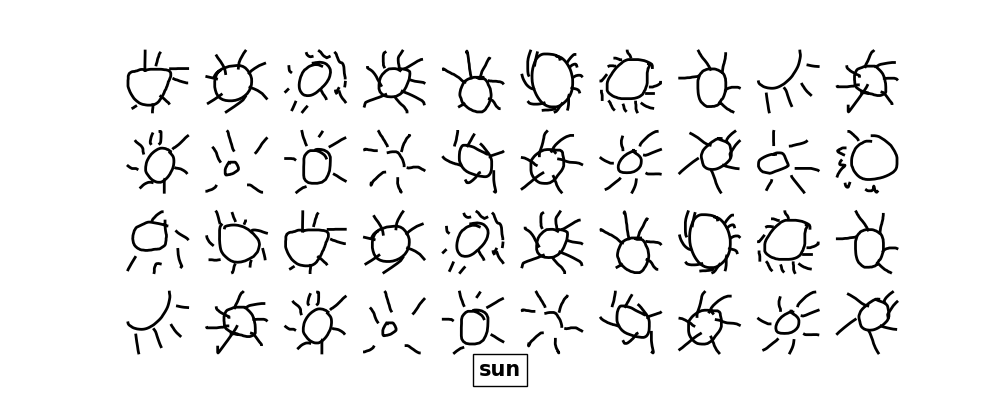

In [17]:
draw.draw_grid_widget(dataset, 'sun', n_rows=4, n_cols=10, start_index=60)

For the most part, these sun drawings are pretty good.

There's some weird ones (like the drawing in the 3rd row, 10th column) but you could probably guess that most of these drawings are suns.

What about something that's a little harder to draw - like lightning?

interactive(children=(Dropdown(description='Row:', options=(1, 2, 3, 4), value=None), Dropdown(description='Co…

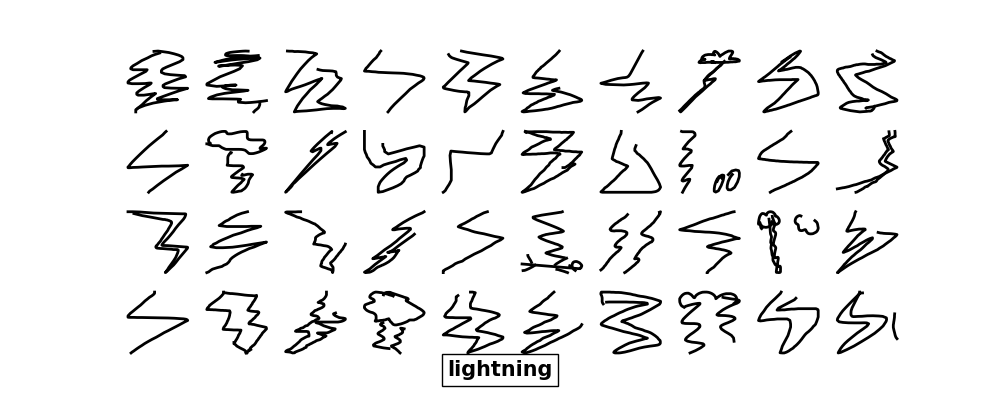

In [17]:
draw.draw_grid_widget(dataset, 'lightning', n_rows=4, n_cols=10, start_index=100)

Remember, DAISY is like a baby! She's never seen lightning before, all she knows about lightning are the drawings we are showing her.

If we show her a lot of bad drawings of lightning, she won't learn very well.

#### Discussion questions:

If you were playing Pictionary...
- What would you guess for the 10th sketch on the 2nd row?
- What would you guess for the 2nd sketch on the 3rd row?

## Creating the AI

Next, we split up the data into *training* and *testing* data.

What does this mean?

Think about training data like homework, and testing data like tests.

We want to give DAISY different test problems than we gave her for homework, so we know that she can solve the problems (not just memorize the solutions!).

In [18]:
datasets, sizes = sketch_class.get_dataset_partitions(dataset, NUM_DATA*len(categories),
                                                      train_split=train_split,
                                                      test_split=test_split,
                                                      validation_split=validation_split)
train_dataset, validate_dataset, test_dataset = datasets
train_size, val_size, test_size = sizes

...and now for the exciting part! This is what it looks like to train an AI. Pretty simple, right?

In [19]:
DAISY = sketch_class.compile_and_fit_model(model_dir, AI_name, epochs, batch_size, MAX_N_PTS,
                                           train_dataset, validate_dataset, train_model=to_train)

[Training AI]
Epoch 1/15
200/200 [==============================] - 94s 388ms/step - loss: 1.2452 - sparse_categorical_accuracy: 0.5525 - val_loss: 0.8801 - val_sparse_categorical_accuracy: 0.6862
Epoch 2/15
200/200 [==============================] - 90s 385ms/step - loss: 0.8560 - sparse_categorical_accuracy: 0.6945 - val_loss: 0.7326 - val_sparse_categorical_accuracy: 0.7350
Epoch 3/15
200/200 [==============================] - 89s 381ms/step - loss: 0.7103 - sparse_categorical_accuracy: 0.7432 - val_loss: 0.7135 - val_sparse_categorical_accuracy: 0.7450
Epoch 4/15
200/200 [==============================] - 88s 377ms/step - loss: 0.6303 - sparse_categorical_accuracy: 0.7677 - val_loss: 0.6204 - val_sparse_categorical_accuracy: 0.7669
Epoch 5/15
200/200 [==============================] - 89s 381ms/step - loss: 0.5823 - sparse_categorical_accuracy: 0.7877 - val_loss: 0.6093 - val_sparse_categorical_accuracy: 0.7781
Epoch 6/15
200/200 [==============================] - 88s 376ms/step - 

## Testing our AI

Now that we have *trained* DAISY, onto the million dollar question: does our AI work? Is DAISY actually able to play weather Pictionary?

Let's test her! Remember, we saved some testing data to check and see if DAISY is working.

In [20]:
raw_test_data, test_labels, predict_labels = test.run_test(test_dataset, batch_size, MAX_N_PTS, DAISY)

25/25 [==============================] - 16s 87ms/step


interactive(children=(ToggleButton(value=False, description='DAISY says...'), Output()), _dom_classes=('widget…

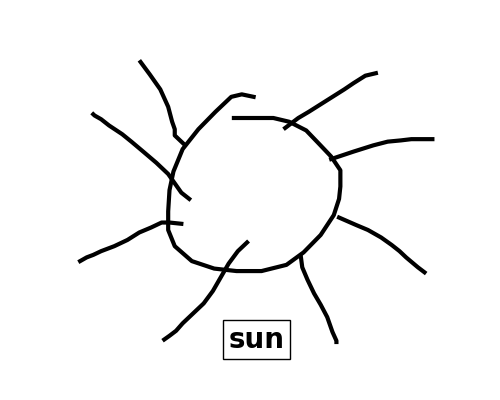

In [21]:
draw.draw_and_label_widget(11, test_dataset, predict_labels)

That one works! The artist said it was a rainbow, and DAISY thinks it's a rainbow. Let's try a few more:

interactive(children=(ToggleButton(value=False, description='DAISY says...'), Output()), _dom_classes=('widget…

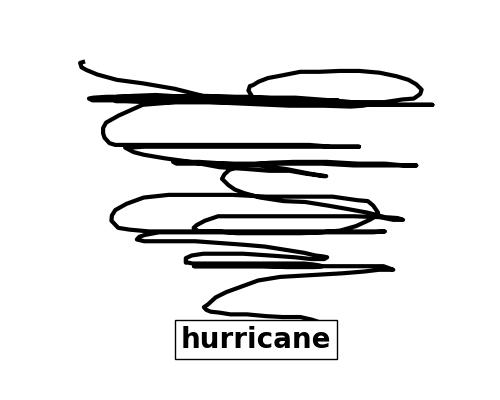

In [22]:
draw.draw_and_label_widget(27, test_dataset, predict_labels)

interactive(children=(ToggleButton(value=False, description='DAISY says...'), Output()), _dom_classes=('widget…

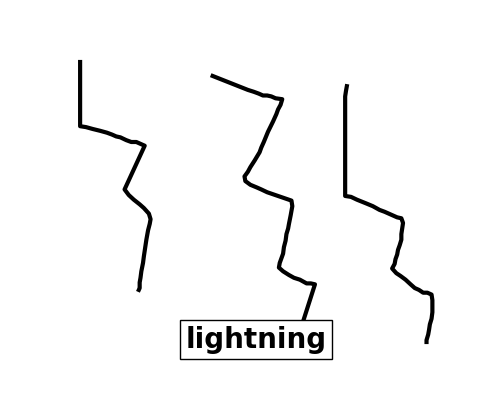

In [23]:
draw.draw_and_label_widget(32, test_dataset, predict_labels)

This one is a fun example of how AI can actually be better than humans at very specific tasks. If you were playing Pictionary, would you have guessed that the sketch above is a hurricane? Maybe not.

But DAISY is so good at identifying hurricane drawings, she can sometimes say when a really bad drawing is a hurricane.

So far, DAISY is doing pretty good! Let's see if we can find a drawing that she gets wrong.

interactive(children=(ToggleButton(value=False, description='DAISY says...'), Output()), _dom_classes=('widget…

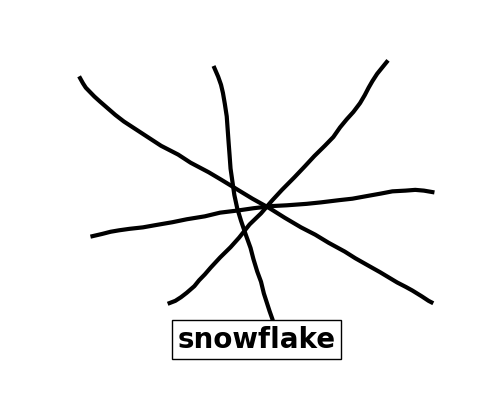

In [24]:
draw.draw_and_label_widget(99, test_dataset, predict_labels)

#### Discussion questions:

- What would *you* label this sketch as?
- Why does DAISY get confused by this sketch?
- Why does DAISY think this sketch is lightning?

Those were some specific examples of sketches DAISY did well at.

If we were giving DAISY a test on her Pictionary-playing abilities, what grade would she get?

In [25]:
test.print_grades(test_labels, predict_labels, 'total')

TOTAL      test grade :  82.31%
                         B-



DAISY labeled around 83% of the drawings on her test correctly, so she gets a grade of B. That's pretty good!

But remember, some things are harder to draw than others. For example, it seems like suns were easy to draw and lightning is harder.

Let's break up DAISY's grade into the different categories: what grade would she have gotten if we only tested her only on sun drawings? Or on just lightning drawings?

In [26]:
for category in categories:
    test.print_grades(test_labels, predict_labels, category_to_grade=category)

CLOUD      test grade : 89.33%
                        B+

HURRICANE  test grade : 59.20%
                        F

LIGHTNING  test grade : 77.56%
                        C+

RAIN       test grade : 85.57%
                        B

RAINBOW    test grade : 95.19%
                        A

SUN        test grade : 96.57%
                        A

SNOWFLAKE  test grade : 82.38%
                        B-

TORNADO    test grade : 75.11%
                        C



### Discussion questions:

- What categories of drawings is DAISY good at guessing?
- What categories of drawings is DAISY bad at guessing?

Let's take a closer look at her test and see if we can figure out why she has a hard time with hurricanes.

She only got 60% of the hurricane drawings correct. What was she guessing for the other 40%?

In [27]:
test.category_report('hurricane', test_labels, predict_labels)

number of...
    HURRICANE drawings DAISY thought were CLOUD drawings:     0
    HURRICANE drawings DAISY thought were LIGHTNING drawings: 0
    HURRICANE drawings DAISY thought were RAIN drawings:      6
    HURRICANE drawings DAISY thought were RAINBOW drawings:   4
    HURRICANE drawings DAISY thought were SUN drawings:       1
    HURRICANE drawings DAISY thought were SNOWFLAKE drawings: 1
    HURRICANE drawings DAISY thought were TORNADO drawings:   70


DAISY incorrectly guessed only 1 hurricane drawing was a sun, but she incorrectly labeled 39 hurricane drawings as tornados.

Let's look at some of the hurricane drawings she got confused for tornados.

interactive(children=(Dropdown(description='category:', options=('cloud', 'lightning', 'rain', 'rainbow', 'sun…

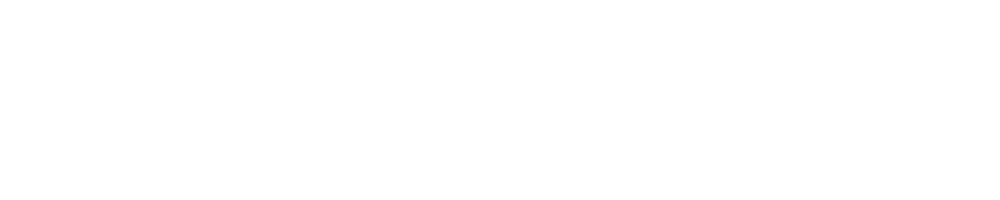

In [28]:
draw.draw_misclassification_grid(raw_test_data, test_labels, predict_labels, 'hurricane', index=0)

### Discussion questions:

- What would you guess for these drawings: tornado or hurricane?

DAISY also got a B- in the rain category. Let's take a closer look at what she was guessing for rain.

In [29]:
test.category_report('rain', test_labels, predict_labels)

number of...
    RAIN drawings DAISY thought were CLOUD drawings:     2
    RAIN drawings DAISY thought were HURRICANE drawings: 6
    RAIN drawings DAISY thought were LIGHTNING drawings: 10
    RAIN drawings DAISY thought were RAINBOW drawings:   0
    RAIN drawings DAISY thought were SUN drawings:       5
    RAIN drawings DAISY thought were SNOWFLAKE drawings: 3
    RAIN drawings DAISY thought were TORNADO drawings:   2


So DAISY often gets rain confused with snowflakes, lightning, and clouds. Let's look at some of the drawings she guessed wrong to see if we can figure out why.

interactive(children=(Dropdown(description='category:', options=('cloud', 'hurricane', 'lightning', 'rainbow',…

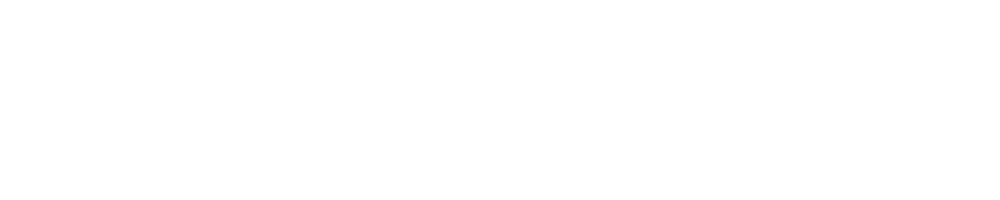

In [30]:
draw.draw_misclassification_grid(raw_test_data, test_labels, predict_labels, 'rain', index=0)

### Discussion questions:

- Why do you think DAISY gets clouds and rain confused so often?

## DAISY's next best guesses

When you're playing Pictionary, you're not limited to just one guess! You might be 90% sure that someone is drawing a dog, but 10% of you thinks it *might* be a cat.

Below we have DAISY look at some of the same drawings we looked at above to see what she's thinking.

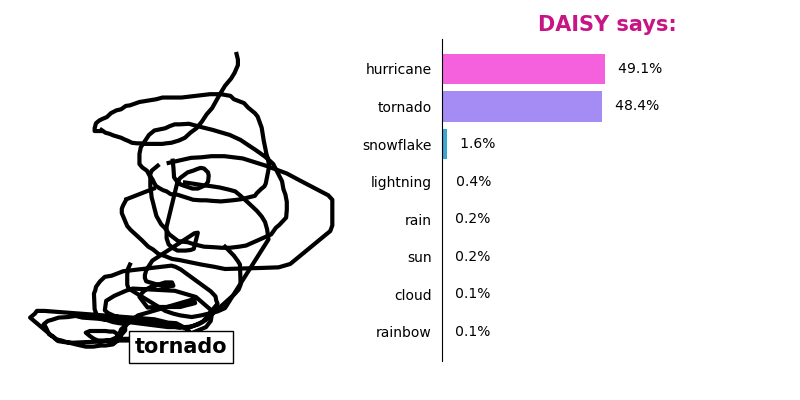

In [31]:
draw.draw_label_probs(raw_test_data, test_labels, predict_labels, 'tornado', index=5)

This is a drawing of tornado that DAISY thinks is a hurricane.

But if we look at her next best guesses in the chart to the right, we can see that she's only 56% confident the drawing is a hurricane.

Her next best guess is tornado, which is the right answer.

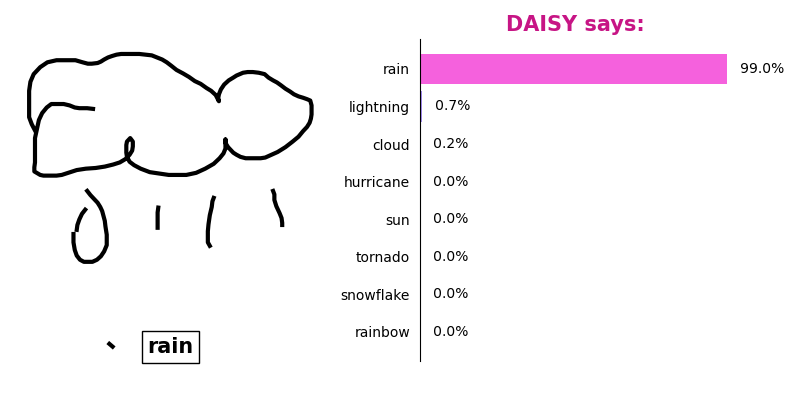

In [32]:
draw.draw_label_probs(raw_test_data, test_labels, predict_labels, 'rain', index=17)

Sometimes she's VERY confident in her answers.

This is a drawing of rain, and DAISY is 99% confident that it's rain.

## OK, let's play Pictionary!

Now for the fun part! We're going to actually play Pictionary with DAISY.

1. Navigate to: [https://sketch.io/sketchpad/](https://sketch.io/sketchpad/). Close out of (click the red "x") on the "Welcome to Sketchpad" window pop-up.

<img src="images/sketchpad_window.png" style="margin:auto;width:400px">

3. Make sure the pencil drawing tool is selected (it will be highlighted yellow by default) and start to draw! Remember, in Pictionary speed is a factor, so keep your drawings quick and simple - nothing too complicated, or DAISY will get confused. **Don't use colors, or other drawing tools other than the pencil.**

<img src="images/pencil_tool.png" style="margin:auto;width:100px">

3. When you are done with your drawing, click "Export" in the toolbar on the lower left of your screen, then "Download .SVG"

<img src="images/export.png" style="width:400px;margin:auto">

<img src="images/svg.png" style="width:400px;margin:auto">

This will save a file to your computer. Remember the location where you save it (probably the "Downloads" folder) and the name (it will be called "Drawing" by default).

4. 

In [33]:
sketch_class.student_predict_and_plot(student_data_dir, MAX_N_PTS, IMG_SIZE, DAISY, batch_size)

interactive(children=(Dropdown(description='category:', options=('cloud', 'hurricane', 'lightning', 'rain', 'r…

## How can we use AIs like DAISY in atmospheric science?

DAISY might not be very useful in atmospheric science - we don't often need to play Pictionary when we're predicting the weather!

But similar image classification AIs are VERY useful to us and are being developed and used by scientists all around the world to:
- help predict the weather
- understand climate change
- reduce damage from natural disasters
- and many more!

## Cloud identification

You may know that there are different kinds of clouds.

interactive(children=(ToggleButton(value=False, description='Label!'), Output()), _dom_classes=('widget-intera…

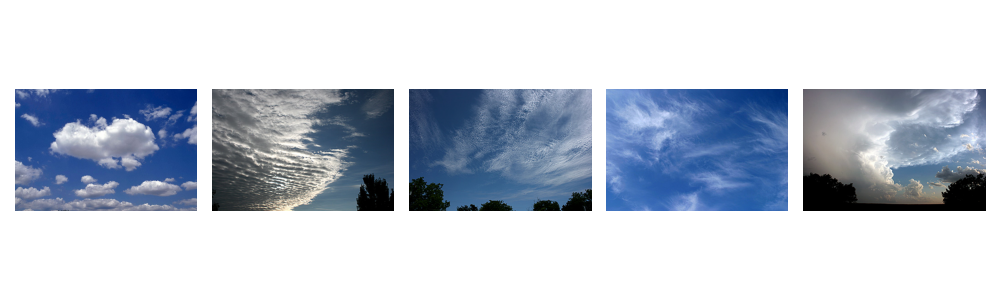

In [34]:
utils.image_grid_widget('images/clouds', 5)

Cumulonimbus clouds often show up right before tornados.

#### Discussion questions:

- Why would you want to know the difference between a cumulonimbus and a cumulus cloud?
- Do you think an AI algorithm would be better than a trained meteorologist (weather scientist) at telling the difference?

## Wildfire smoke vs. clouds

Wildfires can happen when lightning hits a tree and it catches on fire, then the fire starts spreading.

If it happens in the forest, it might take a long time before people know a wildfire is happening.

Satellites are constantly taking pictures of the Earth from space. Satellites take millions of pictures of the Earth every day!

interactive(children=(ToggleButton(value=False, description='Label!'), Output()), _dom_classes=('widget-intera…

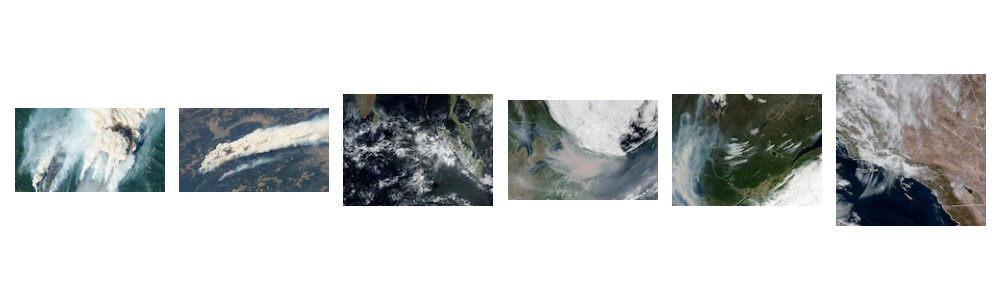

In [35]:
utils.image_grid_widget('images/smoke', 6)

Here's some examples of what wildfire smoke vs. clouds look like from satellite pictures.

#### Discussion questions:

- Why it would be useful to tell the difference between smoke and a cloud from space?
- Why wouldn't we just have humans look at all the satellite images?

## Final discussion

- Is it difficult to make an AI to do image classification? What are some of the problems we had making DAISY?
- How are AIs like DAISY useful in atmospheric science?